In [24]:
from time import sleep
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Regression Analysis quantifies the relationship between two variables
# Dependent and Independent variables
# House prices vs size
# Independent (or explanatory) variable = size, dependent variable = prices
# 1 variable is called a simple or univariate regression
# multiple variables is called a multivarate regression
# Will cover OLS Regression: Ordinary Least Squares

In [26]:
data = pd.read_excel('Housing.xlsx')

In [27]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [28]:
data.columns

Index(['House Price', 'House Size (sq.ft.)', 'State', 'Number of Rooms',
       'Year of Construction'],
      dtype='object')

In [29]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [30]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [31]:
# X independent variable
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [32]:
# Y is dependent varialble: it depends on X
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

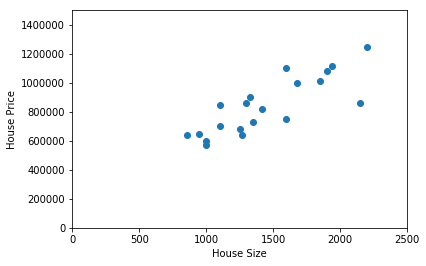

In [33]:
plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size');

In [35]:
# X is independent variable, Y is dependent variable
# important to note that there are many factors that influence a house price; size is not the only factor
# A simple regression will omit some important factors, which will result in an estimation error
# simple regression useful but it isn't perfect
# We need to include the an error term or the residuals: Y = alpha + betaX + error (error = residuals)
# The best fit line minimized the sum of the squared residuals
# The coefficients found with this technique are called OLS estimates (Ordinary Least Squares)
# Are all regressions created equal? Certain variables are better at predicting other variables
# House size is one of the better indicators of house price 
# Some regressions have higher explanitory power than others.
# Good vs Bad (Stong vs Weak) regressions: Determine with R squared (R^2)
# We need to look at the variability of the data
# We use variance to look at the variability of the data
# Total Sum of Squares (TSS) provides a sense of the variability of the data
# R^2 varies between 0% to 100% and the higher it is, the more predictive power the model has.
# less that 10%: the model has little predictive power
# 30% or more are "solid" indicators of future performance.

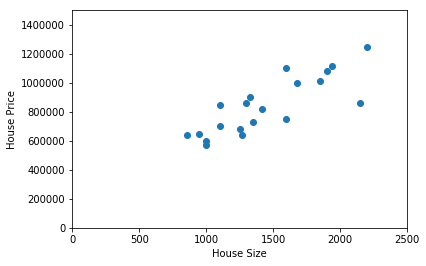

In [36]:
plt.scatter(X,Y)
plt.axis([0,2500,0,1500000])
plt.ylabel('House Price')
plt.xlabel('House Size');

In [37]:
# Stats Models 
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [42]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           8.13e-06
Time:                        15:48:12   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Alpha is Const Coef. See above
2.608e+05

260800.0

In [50]:
# Beta is 401.9163
round(401.9163)

402

In [51]:
# Std is $65.243 +- sq ft

In [53]:
# Expected value of a house that is 1000 sq ft would be (Y = beta + alpha*X)
2.608e+05 + round(401.9163)*1000

662800.0

In [54]:
# Alternately Scipy can do the give use the same info very quickly
slope, intercept, r_val, p_val, std_err = stats.linregress(X,Y)

In [55]:
stats.linregress(X,Y)

LinregressResult(slope=401.91628631922595, intercept=260806.23605609639, rvalue=0.82357755346969241, pvalue=8.1296423772313077e-06, stderr=65.242995106364916)

In [56]:
intercept + slope*1000

662722.52237532241

In [57]:
slope

401.91628631922595

In [58]:
intercept

260806.23605609639

In [59]:
r_val

0.82357755346969241

In [60]:
r_val**2

0.67827998657912403

In [61]:
p_val

8.1296423772313077e-06

In [62]:
std_err

65.242995106364916